# Airline Review Analysis
&emsp;This project exercises web scraping and word analysis to examine the reviews on British Airways from [skytrax](https://www.airlinequality.com).

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud

import transformers as tf
from transformers import pipeline
from transformers import AutoTokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This time British Airways ...
1,"✅ Trip Verified | The seats were excellent, ..."
2,✅ Trip Verified | After the nightmare of get...
3,✅ Trip Verified | Prior to boarding a gate a...
4,✅ Trip Verified | I flew from Amsterdam to L...


In [4]:
print(df.iloc[0].values)
df.tail()

['✅ Trip Verified |\xa0 \xa0This time British Airways managed to get everything right. The price of the tickets was reasonable and the timing was perfect. Boarding was smooth and the seats were comfortable – easy reline to enable dozing and sufficient pitch to get in and out. The table was firm enough to allow the use of a small laptop and mouse. A pre-flight soft drink or Prosecco was offered and both the food and drink were more than sufficient. The best part was the cabin crew – two in PE and they were both extremely efficient, pleasant and witty. There was a good selection of movies and both the screen and the headset worked perfectly.']


,reviews
995,✅ Trip Verified | London to St Petersburgh. H...
996,✅ Trip Verified | Sydney to London via Singap...
997,Not Verified | London to Johannesburg. Britis...
998,✅ Trip Verified | I have to say travelling in ...
999,Not Verified | I had a stress free journey wi...


* The reviews include irrelevant words at the beginning.
* Reviews will be processed including `lowercase conversion`, `punctuation removal`, `tokenisation`, `stopword removal`, and `lemmatisation`.

In [5]:
# Lowercase
df_lower = df['reviews'].str.lower()
df_lower.head(2)

,reviews
0,✅ trip verified | this time british airways ...
1,"✅ trip verified | the seats were excellent, ..."


In [6]:
# Remove punctuation
def punctuation(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)
df_punc = df_lower.apply(punctuation)
df_punc.head(2)

,reviews
0,trip verified this time british airways ...
1,trip verified the seats were excellent ...


In [7]:
# Tokenisation
def tokenization(inputs):
    return word_tokenize(inputs)
df_token = df_punc.apply(tokenization)
df_token.head(2)

,reviews
0,"[trip, verified, this, time, british, airways,..."
1,"[trip, verified, the, seats, were, excellent, ..."


In [8]:
# Remove first two words
df_token = df_token.apply(lambda r: r[2:])
df_token.head(2)

,reviews
0,"[this, time, british, airways, managed, to, ge..."
1,"[the, seats, were, excellent, with, a, feel, o..."


In [9]:
# Remove stop words
stop_words = set(stopwords.words('english'))
# stop_words.remove('not')
stop_words.add('br')
def stopwords_remove(inputs):
    return [word for word in inputs if word not in stop_words]
df_stop = df_token.apply(stopwords_remove)
df_stop.head(2)

,reviews
0,"[time, british, airways, managed, get, everyth..."
1,"[seats, excellent, feel, much, room, official,..."


In [10]:
# Lemmatisation
lemmatizer = WordNetLemmatizer()
def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=word, pos='v') for word in inputs]
df_lemma = df_stop.apply(lemmatization)
df_lemma.head(2)

,reviews
0,"[time, british, airways, manage, get, everythi..."
1,"[seat, excellent, feel, much, room, official, ..."


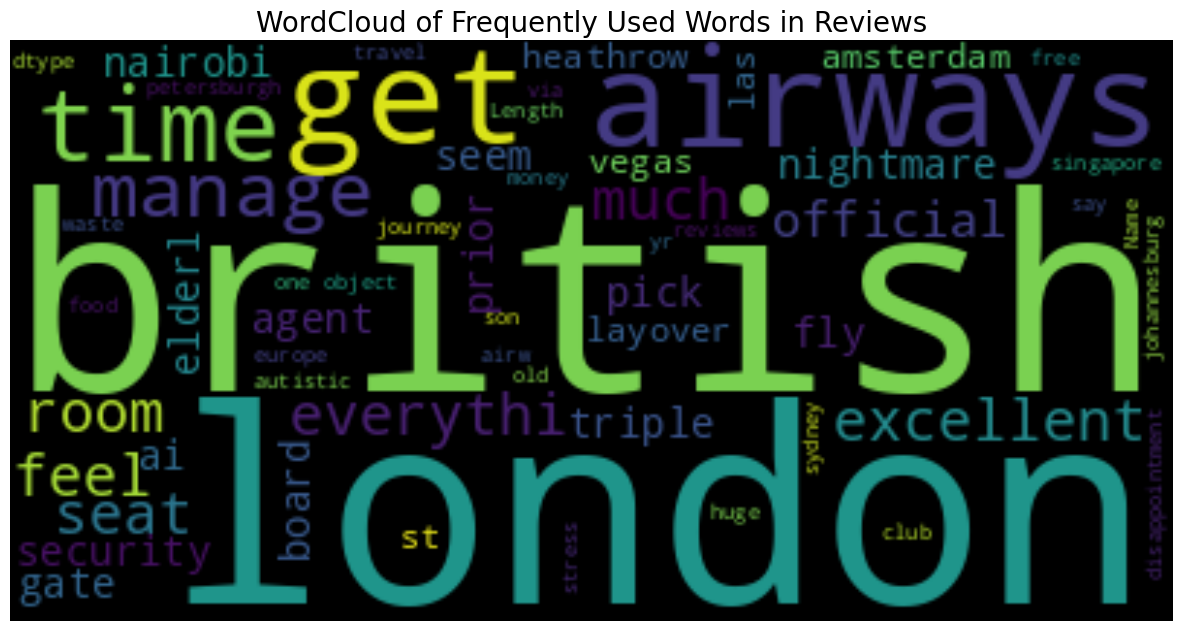

In [11]:
word_cloud = WordCloud(max_words=500, stopwords=stop_words, random_state=4).generate(str((df_lemma)))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Reviews', fontsize=20)
plt.axis("off")
plt.show()

* There are some apparently irrelevant words shown in the word cloud.
* Words such as london, british, and other places in the word cloud will be removed.

In [25]:
stop_words.add('london')
stop_words.add('british')
stop_words.add('airways')
stop_words.add('heathrow')
stop_words.add('amsterdam')
stop_words.add('singapore')
stop_words.add('johannesburg')
stop_words.add('vegas')
stop_words.add('petersburgh')
stop_words.add('flight')
stop_words.add('ba')

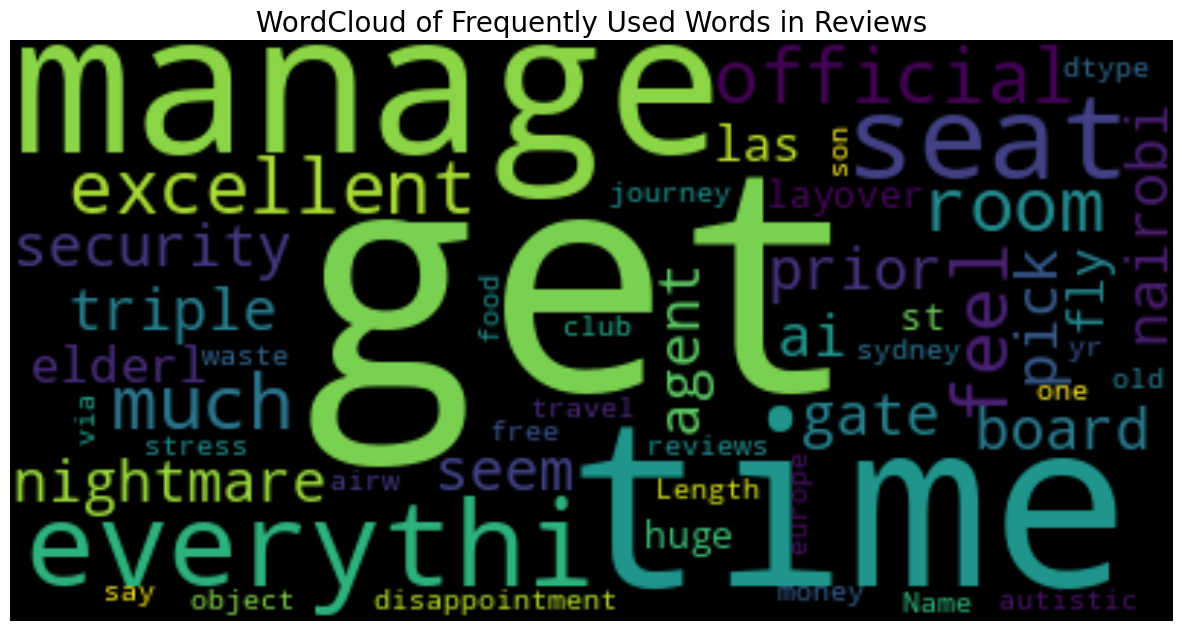

In [13]:
word_cloud = WordCloud(max_words=500, stopwords=stop_words, random_state=4).generate(str((df_lemma)))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Reviews', fontsize=20)
plt.axis("off")
plt.show()

* Still, there are plen aty of words that are difficult to be thought ofs either positive or negative. Only a few of them such as `excellent`, `nightmare`, and `disappointment` provided obvious insight about the reviews.

# Transfomer

In [15]:
# Tokenise
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
df_encode = tokenizer([str(v) for v in df['reviews'].values], max_length=200, truncation=True, padding=True, add_special_tokens=True)

df_array = np.array(df_encode['input_ids']).reshape(1000,200)

sentiment_pipeline = pipeline("sentiment-analysis")
result = sentiment_pipeline([str(r) for r in df_array])
result = pd.DataFrame(result)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [27]:
result['review'] = df['reviews']
result.head()

,label,score,review
0,NEGATIVE,0.556152,✅ Trip Verified | This time British Airways ...
1,NEGATIVE,0.501595,"✅ Trip Verified | The seats were excellent, ..."
2,POSITIVE,0.561848,✅ Trip Verified | After the nightmare of get...
3,NEGATIVE,0.542902,✅ Trip Verified | Prior to boarding a gate a...
4,POSITIVE,0.528126,✅ Trip Verified | I flew from Amsterdam to L...


## Verify Result

In [28]:
sample1 = result.sample(1)
print(f"Label: {sample1['label']}")
print(f"Review:\n{sample1['review'].values}")

Label: 309    POSITIVE
Name: label, dtype: object
Review:
['✅ Trip Verified | An airline that lives in their past glory and heading a future of crisis is British Airways. I am not joking we are a family of 7 all in Business Class heading for a Norwegian and Arctic Cruise and they lost 10 of our bags! They will never see me on any of their flights ever a disaster of an airline']


* Upon checking on some random samples, occasionally the classification is not perfect.

In [29]:
result['label'].value_counts()

,count
label,
NEGATIVE,529
POSITIVE,471


* Among the recent 1000 reviews, there were `529` negative and `471` positive reviews.

# Top Words for Each Label

In [30]:
def top_words(reviews):
    word_counts = {}
    for review in reviews:
        for word in review:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1
    return sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

In [31]:
# Process review column
result['review'] = result['review'].str.lower()
result['review'] = result['review'].apply(punctuation)
result['review'] = result['review'].apply(tokenization)
result['review'] = result['review'].apply(lambda r: r[2:])
result['review'] = result['review'].apply(stopwords_remove)
result['review'] = result['review'].apply(lemmatization)
result['review'].head()

,review
0,"[time, manage, get, everything, right, price, ..."
1,"[seat, excellent, feel, much, room, official, ..."
2,"[nightmare, get, triple, security, nairobi, ai..."
3,"[prior, board, gate, agent, seem, pick, elderl..."
4,"[fly, las, layover, november, day, fly, weathe..."


In [32]:
pos_words = top_words(result.loc[result['label']=='POSITIVE', 'review'])
for i, key in zip(range(10), pos_words):
    print(f"{i}: {key[0]}")

0: seat
1: time
2: service
3: check
4: get
5: fly
6: board
7: food
8: crew
9: good


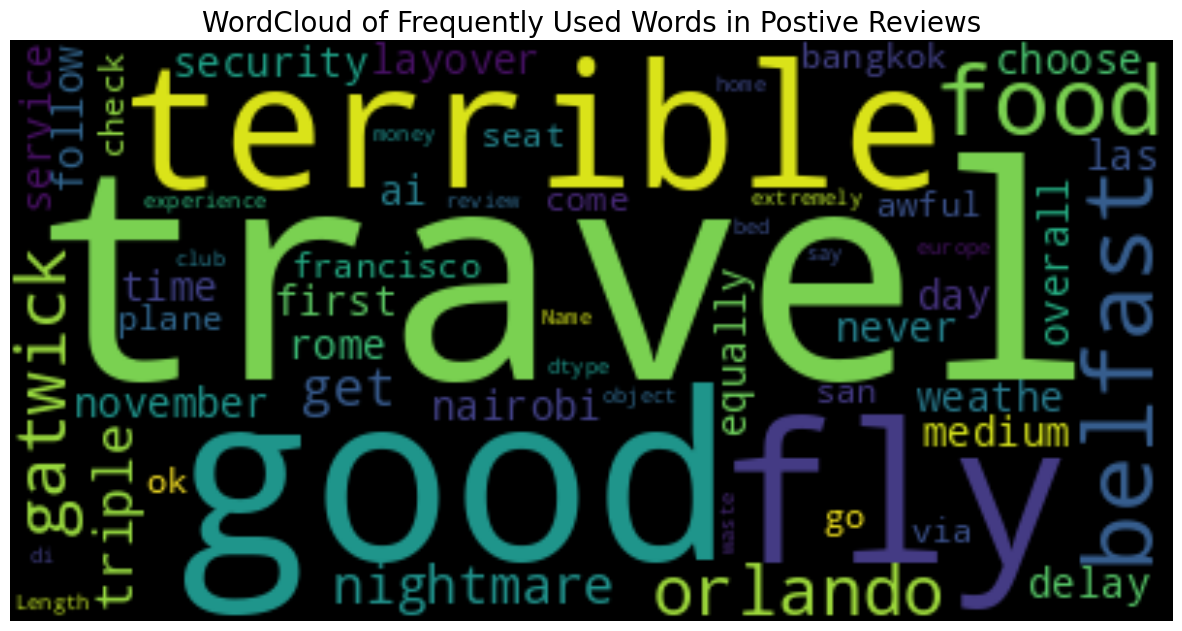

In [33]:
word_cloud = WordCloud(max_words=500, stopwords=stop_words, random_state=4).generate(str((result.loc[result['label']=='POSITIVE', 'review'])))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Postive Reviews', fontsize=20)
plt.axis("off")
plt.show()

In [34]:
neg_words = top_words(result.loc[result['label']=='NEGATIVE', 'review'])
for i, key in zip(range(10), neg_words):
    print(f"{i}: {key[0]}")

0: seat
1: service
2: get
3: time
4: fly
5: class
6: business
7: crew
8: book
9: one


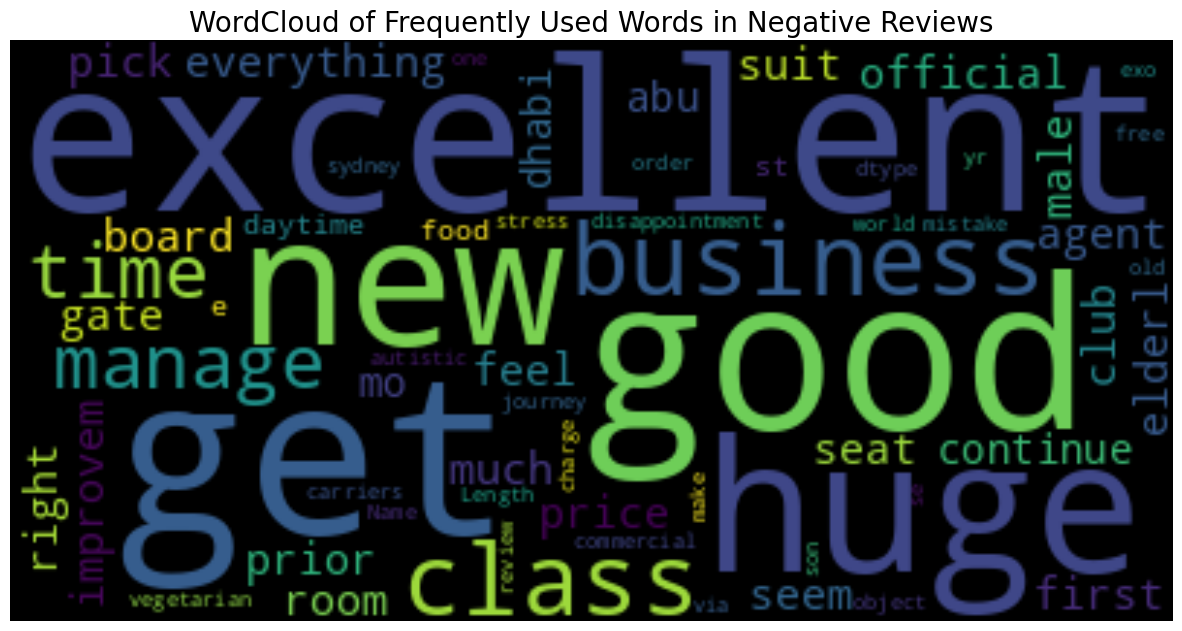

In [35]:
word_cloud = WordCloud(max_words=500, stopwords=stop_words, random_state=4).generate(str((result.loc[result['label']=='NEGATIVE', 'review'])))
plt.figure(figsize=(15, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.title('WordCloud of Frequently Used Words in Negative Reviews', fontsize=20)
plt.axis("off")
plt.show()

* Reviews from both labels seem to focus on services **on board** regarding `seat`, `food`, and `crew`.
* `Business` is seen in the most frequent words among the negative reviews. Are business class passengers are more likely to complain or the services in business class is not satisfying?